In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

df_input = pd.read_csv("../controlled_DATA/latency-parsed/input-driver-latency.csv")
df_2Bidi = pd.read_csv("../controlled_DATA/latency-parsed/netflow2Bidi-latency.csv")
df_agg   = pd.read_csv("../controlled_DATA/latency-parsed/netflowAgg-latency.csv")
df_cds   = pd.read_csv("../controlled_DATA/latency-parsed/consumerCDS-latency.csv")


In [2]:
# Get only even rows from df_input in a way to make all dataframes have 1250 samples
df_input = df_input.iloc[::2].reset_index(drop=True)
print("df_input.shape:\t", df_input.shape)
# Drop Na values in df_2Bidi
df_2Bidi = df_2Bidi.dropna().reset_index(drop=True)
print("df_2Bidi.shape:\t", df_2Bidi.shape)

print("df_agg.shape:\t", df_agg.shape)
print("df_cds.shape:\t", df_cds.shape)

df_input.shape:	 (1250, 3)
df_2Bidi.shape:	 (1250, 3)
df_agg.shape:	 (1250, 3)
df_cds.shape:	 (1250, 3)


In [3]:
# create duration_ms columns
df_input["duration"] = df_input['nanoTimestamp-End'] - df_input['nanoTimestamp-Start']
df_2Bidi["duration"] = df_2Bidi['nanoTimestamp-End'] - df_2Bidi['nanoTimestamp-Start']
df_agg["duration"]   = df_agg['nanoTimestamp-End']   - df_agg['nanoTimestamp-Start']
df_cds["duration"]   = df_cds['nanoTimestamp-End']   - df_cds['nanoTimestamp-Start']

# calculate duration in milliseconds
df_input["duration_ms"] = df_input["duration"]/1000000
df_2Bidi["duration_ms"] = df_2Bidi["duration"]/1000000
df_agg["duration_ms"] = df_agg["duration"]/1000000
df_cds["duration_ms"] = df_cds["duration"]/1000000

##### Calculate throughput and other metrics

In [4]:
total_packets = 1250
df_input_th = 2500/(df_input['nanoTimestamp-Start'].iloc[-1] - df_input['nanoTimestamp-Start'].iloc[0])*1000000000
df_2Bidi_th = 2500/(df_2Bidi['nanoTimestamp-Start'].iloc[-1] - df_2Bidi['nanoTimestamp-Start'].iloc[0])*1000000000
df_agg_th   = 1250/(df_agg['nanoTimestamp-Start'].iloc[-1]   - df_agg['nanoTimestamp-Start'].iloc[0])*1000000000
df_cds_th   = 1250/(df_cds['nanoTimestamp-Start'].iloc[-1]   - df_cds['nanoTimestamp-Start'].iloc[0])*1000000000

print("MEAN EVENTS PER SECOND")
print("df_input_th:\t", df_input_th)
print("df_2Bidi_th:\t", df_2Bidi_th)
print("df_agg_th:\t", df_agg_th)
print("df_cds_th:\t", df_cds_th)

MEAN EVENTS PER SECOND
df_input_th:	 0.9947005477843529
df_2Bidi_th:	 0.995015432868801
df_agg_th:	 0.9948279018734685
df_cds_th:	 0.9942214472006812


##### DURATION OF EACH PROCESSED EVENT

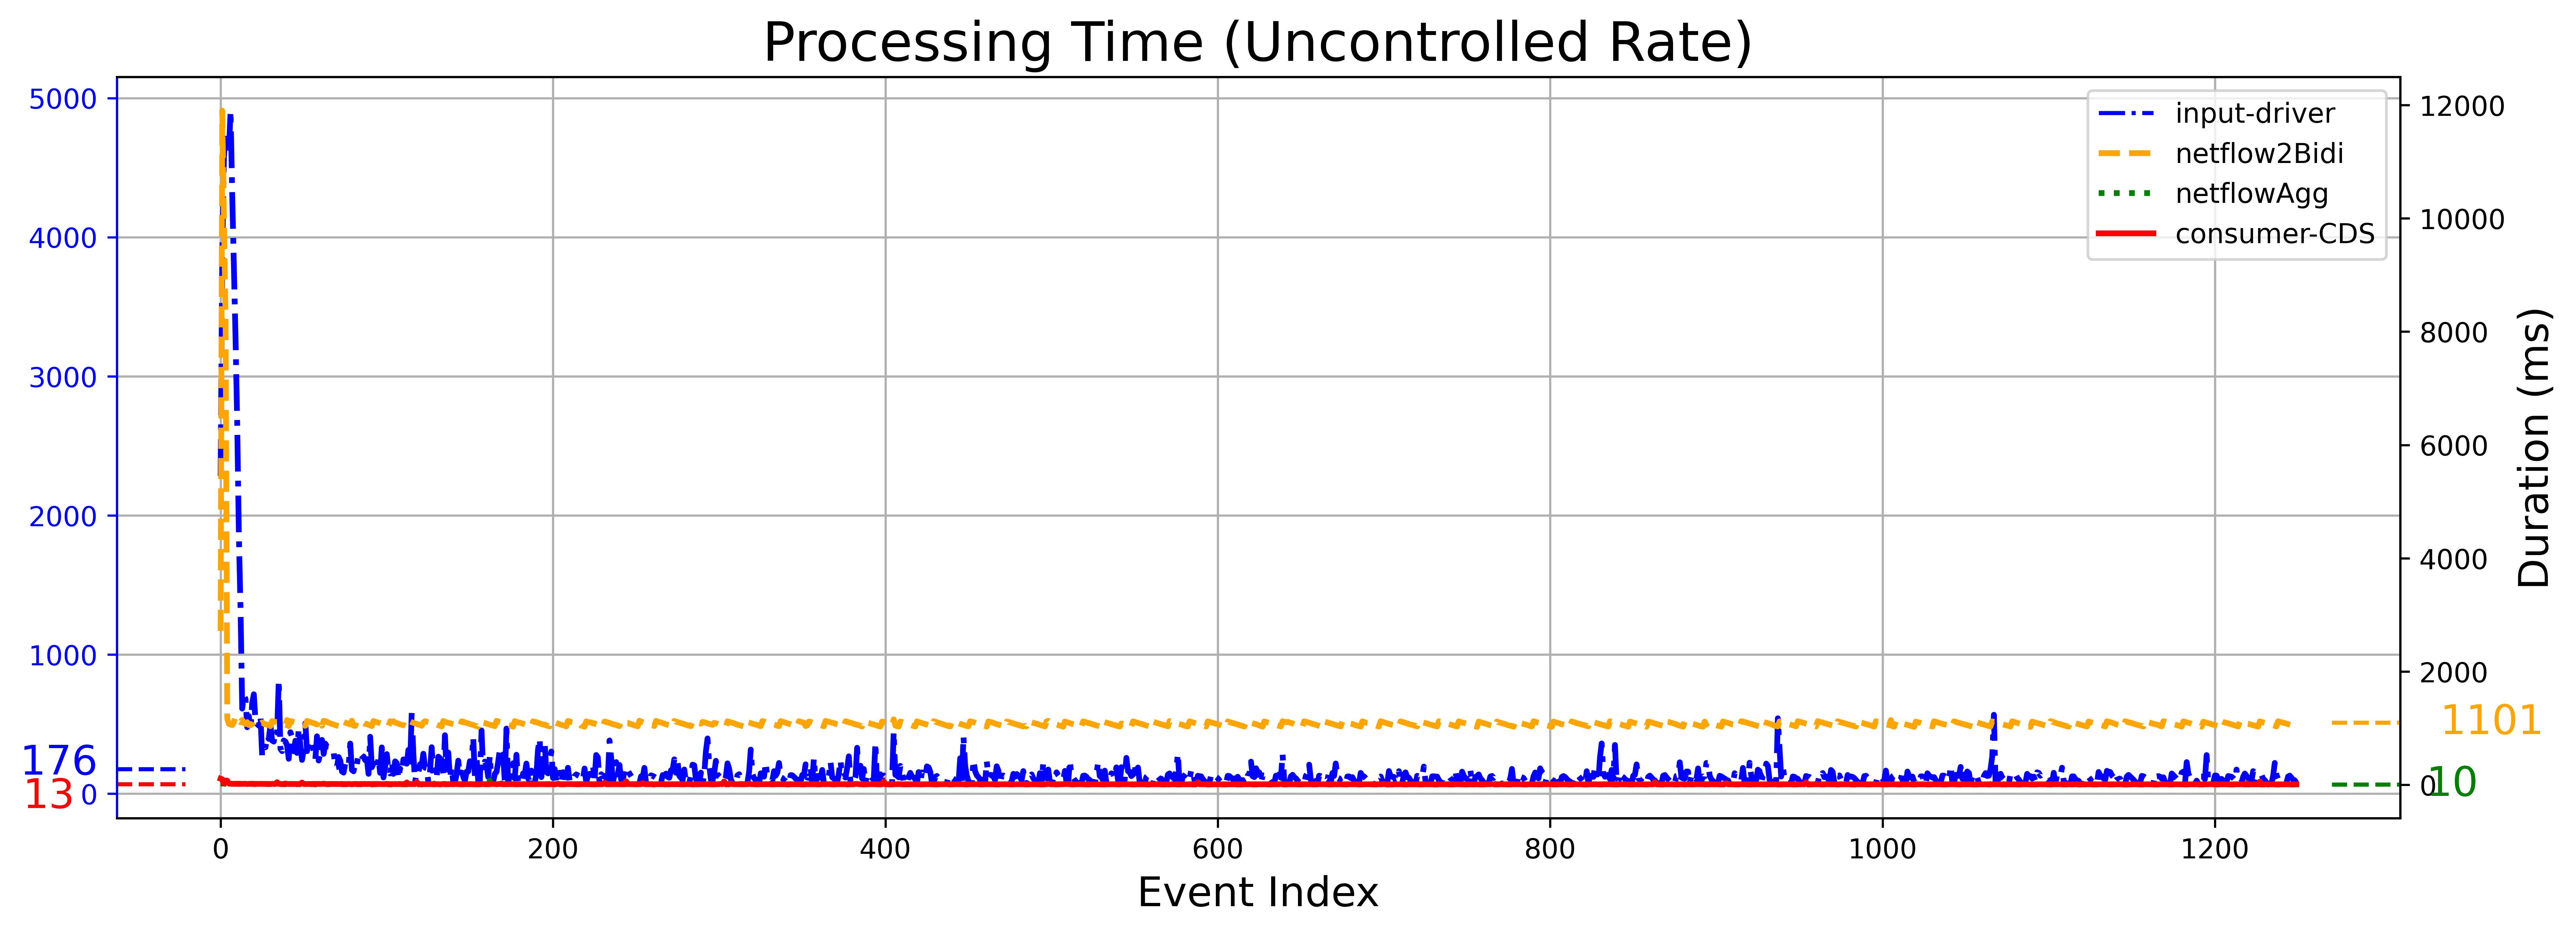

In [5]:
# USED for the data without controlling the event rate so input-driver has so much higher latency because of the saturation
import matplotlib.transforms as transforms

fig, ax = plt.subplots(figsize=(15, 5), dpi=600)

ax2=ax.twinx()
# to add input-driver to the legend
ax2.plot(np.nan, label = 'input-driver', color="blue", linestyle="dashdot")

# LINES
ax.plot(df_input.index.to_list(), df_input["duration_ms"].to_list(), color='blue', label="input-driver", linewidth=2.1, linestyle="dashdot")
ax2.plot(df_2Bidi.index.to_list(), df_2Bidi["duration_ms"].to_list(), color='orange', label="netflow2Bidi", linewidth=2.1, linestyle="dashed")
ax2.plot(df_agg.index.to_list(), df_agg["duration_ms"].to_list(), color='green', label="netflowAgg", linewidth=2.1, linestyle="dotted")
ax2.plot(df_cds.index.to_list(), df_cds["duration_ms"].to_list(), color='red', label="consumer-CDS", linewidth=2.1, linestyle="solid")

# MEANS
ax.axhline(df_input["duration_ms"].mean(), xmin=0, xmax=0.03, color='blue', linestyle='--')
ax2.axhline(df_2Bidi["duration_ms"].mean(), xmin=0.97, xmax=1, color='orange', linestyle='--')
ax2.axhline(df_agg["duration_ms"].mean(), xmin=0.97, xmax=1, color='green', linestyle='--')
ax2.axhline(df_cds["duration_ms"].mean(), xmin=0, xmax=0.03, color='red', linestyle='--')


# CONFIGURATION AX
ax.set_title("Processing Time (Uncontrolled Rate)", size=20)
ax.set_xlabel("Event Index", size=15)
ax.grid()
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,df_input["duration_ms"].mean()+42, "{:.0f}".format(df_input["duration_ms"].mean()), color="blue", transform=trans, 
        ha="right", va="center", size=15)
ax.text(-0.01,df_cds["duration_ms"].mean()-33, "{:.0f}".format(df_cds["duration_ms"].mean()), color="red", transform=trans, 
        ha="right", va="center", size=15)

#CONFIGURATION AX2
ax2.set_ylabel("Duration (ms)",fontsize=15)
ax2.spines['left'].set_color('blue')
ax.tick_params(axis="y", colors='blue', which='both')
# ax2.set_ylim(0, 1200)
ax2.legend(loc="best")
trans = transforms.blended_transform_factory(
    ax2.get_yticklabels()[0].get_transform(), ax2.transData)
ax2.text(1.009,df_2Bidi["duration_ms"].mean(), "{:.0f}".format(df_2Bidi["duration_ms"].mean()), color="orange", transform=trans, 
        ha="left", va="center", size=15)
ax2.text(1.003,df_agg["duration_ms"].mean(), "{:.0f}".format(df_agg["duration_ms"].mean()), color="green", transform=trans, 
        ha="left", va="center", size=15)

plt.show()

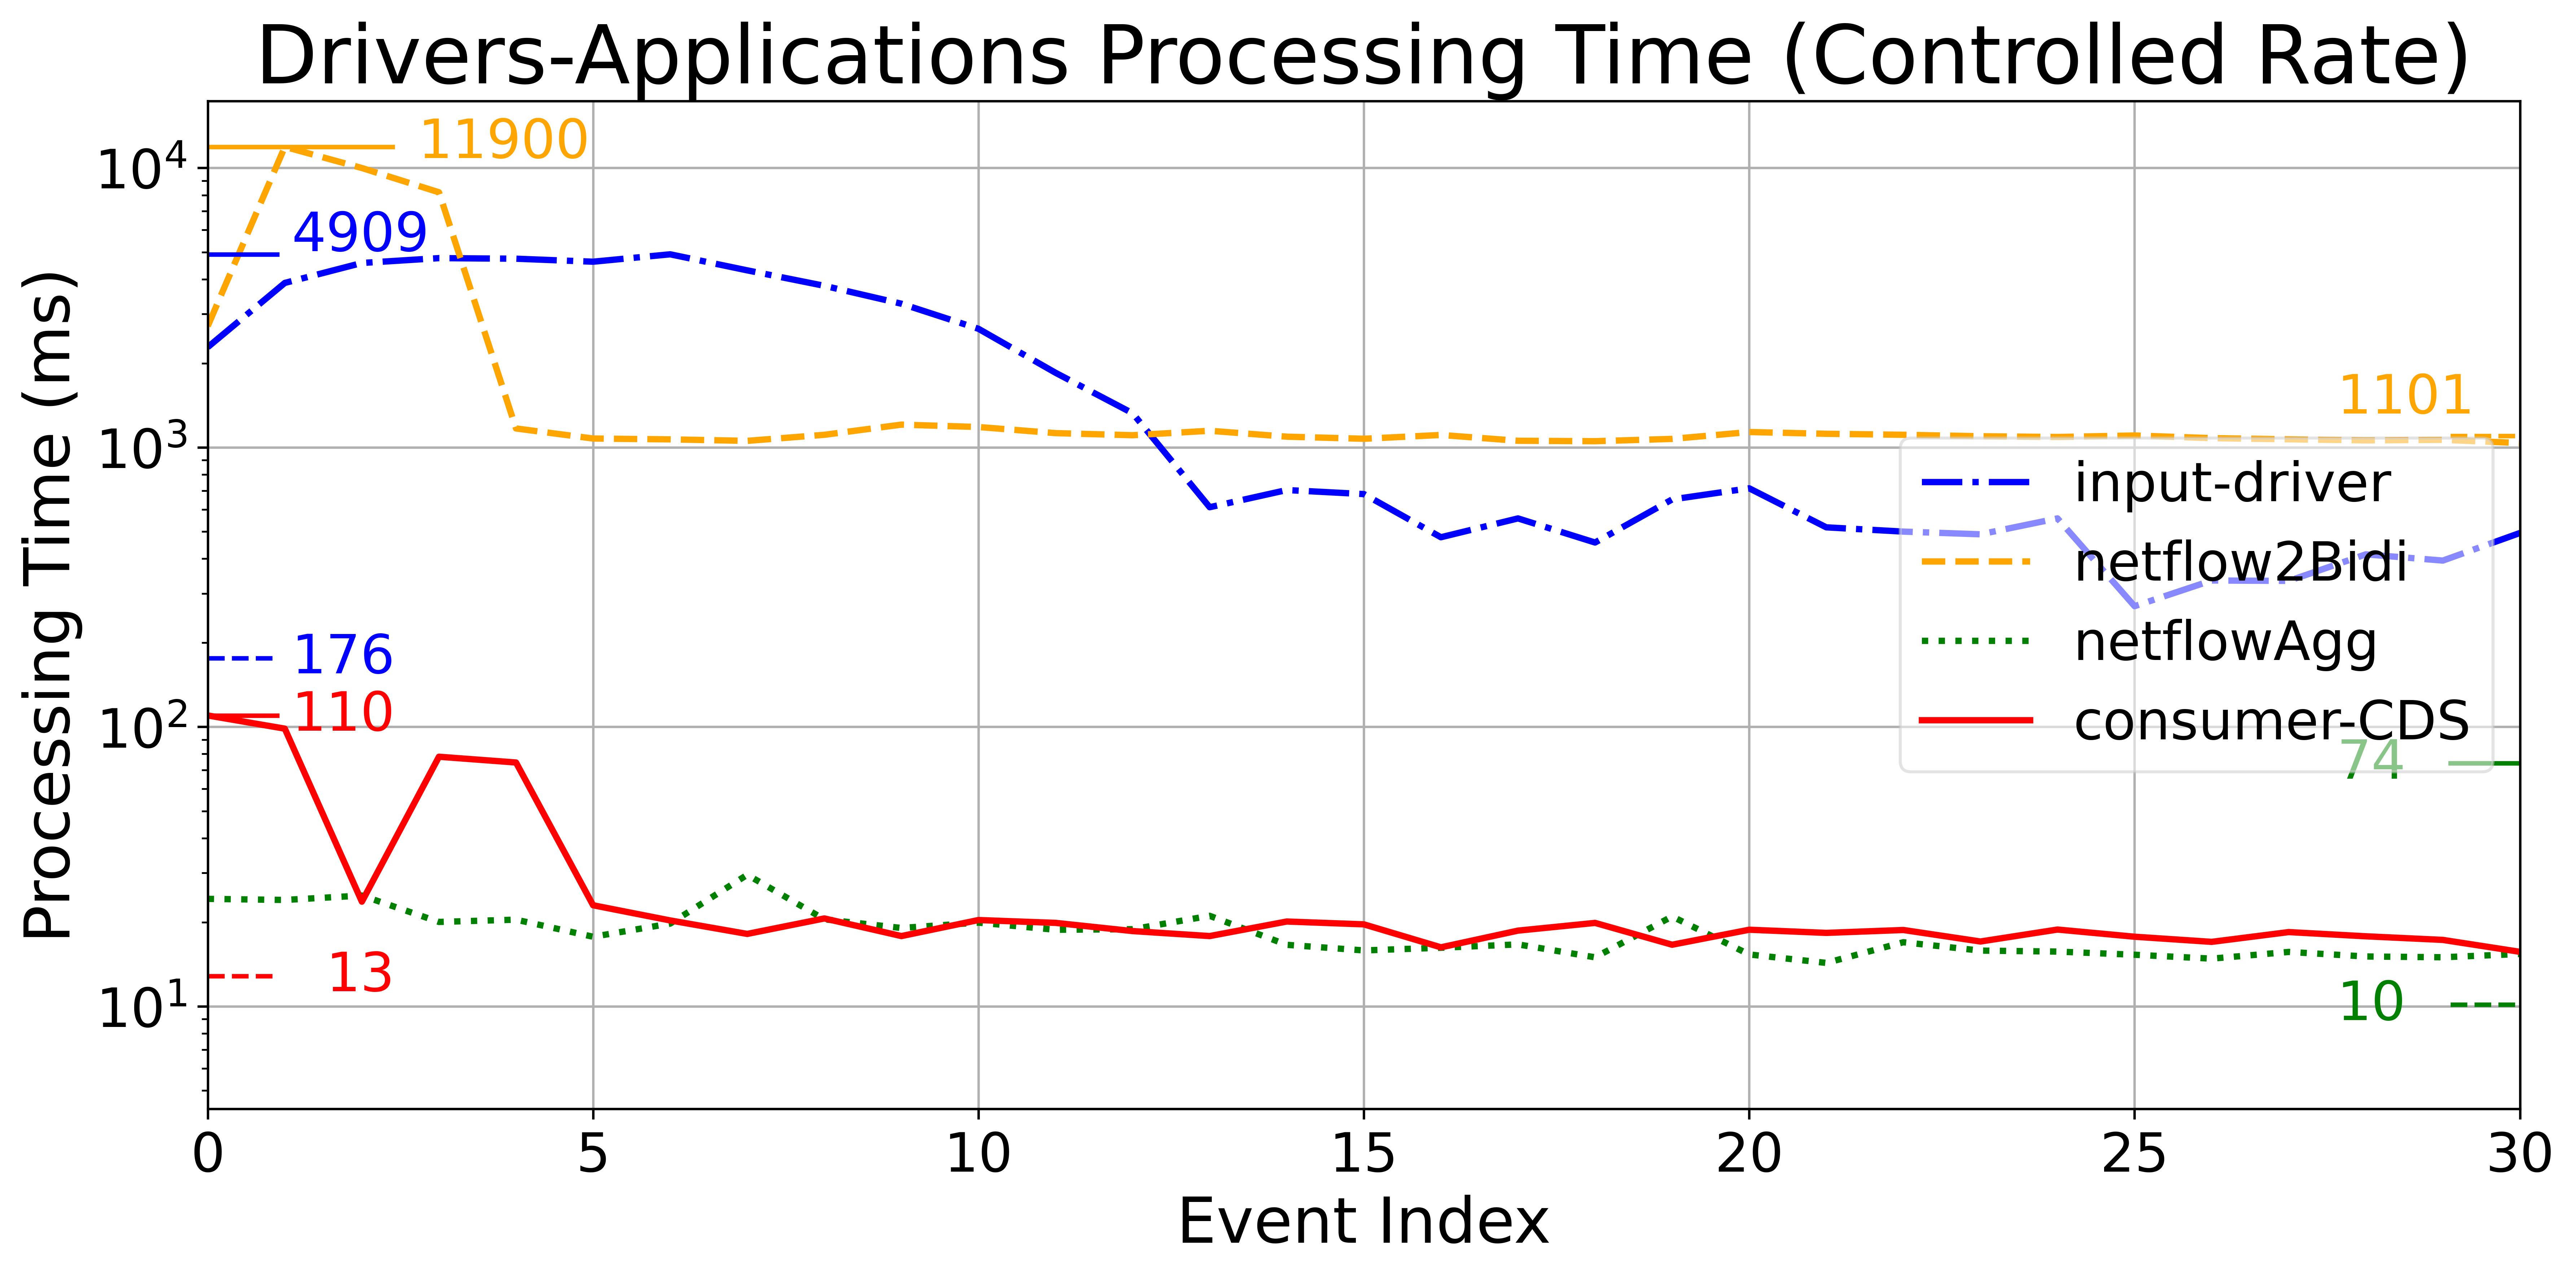

In [6]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots(figsize=(12, 6), dpi=600)

# to add input-driver to the legend
# ax2.plot(np.nan, label = 'input-driver', color="blue", linestyle="dashdot")

# LINES
ax.plot(df_input.index.to_list(), df_input["duration_ms"].to_list(), color='blue', label="input-driver", linewidth=2.1, linestyle="dashdot")
ax.plot(df_2Bidi.index.to_list(), df_2Bidi["duration_ms"].to_list(), color='orange', label="netflow2Bidi", linewidth=2.1, linestyle="dashed")
ax.plot(df_agg.index.to_list(), df_agg["duration_ms"].to_list(), color='green', label="netflowAgg", linewidth=2.1, linestyle="dotted")
ax.plot(df_cds.index.to_list(), df_cds["duration_ms"].to_list(), color='red', label="consumer-CDS", linewidth=2.1, linestyle="solid")

# MEANS
ax.axhline(df_input["duration_ms"].mean(), xmin=0, xmax=0.03, color='blue', linestyle='--')
ax.axhline(df_2Bidi["duration_ms"].mean(), xmin=0.97, xmax=1, color='orange', linestyle='--')
ax.axhline(df_agg["duration_ms"].mean(), xmin=0.97, xmax=1, color='green', linestyle='--')
ax.axhline(df_cds["duration_ms"].mean(), xmin=0, xmax=0.03, color='red', linestyle='--')

# MAXIMUM
# MEANS
ax.axhline(df_input["duration_ms"].max(), xmin=0, xmax=0.03, color='blue', linestyle='-')
ax.axhline(df_2Bidi["duration_ms"].max(), xmin=0, xmax=0.08, color='orange', linestyle='-')
ax.axhline(df_agg["duration_ms"].max(), xmin=0.97, xmax=1, color='green', linestyle='-')
ax.axhline(df_cds["duration_ms"].max(), xmin=0, xmax=0.03, color='red', linestyle='-')

ax.set(yscale='log')

# CONFIGURATION AX
ax.set_title("Drivers-Applications Processing Time (Controlled Rate)", size=27)
ax.set_xlabel("Event Index", size=21)
ax.set_ylabel("Processing Time (ms)",fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.legend(loc='right', framealpha=0.54, fontsize=18)
ax.grid()

ax.set_xlim([0, 30])

# TEXT CONFIGURATION
# transform make the position relative to the y axis [0-1]
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.09,df_input["duration_ms"].mean(), "{:.0f}".format(df_input["duration_ms"].mean()), color="blue", transform=trans,
        ha="right", va="center", size=18)
ax.text(0.09,df_cds["duration_ms"].mean(), "{:.0f}".format(df_cds["duration_ms"].mean()), color="red", transform=trans,
        ha="right", va="center", size=18)
ax.text(0.93,df_2Bidi["duration_ms"].mean()+400, "{:.0f}".format(df_2Bidi["duration_ms"].mean()), color="orange", transform=trans,
        ha="left", va="center", size=18)
ax.text(0.93,df_agg["duration_ms"].mean(), "{:.0f}".format(df_agg["duration_ms"].mean()), color="green", transform=trans,
        ha="left", va="center", size=18)


# TEXT CONFIGURATION FOR MAXIMUM VALUES
# transform make the position relative to the y axis [0-1]
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.105,df_input["duration_ms"].max()+800, "{:.0f}".format(df_input["duration_ms"].max()), color="blue", transform=trans,
        ha="right", va="center", size=18)
ax.text(0.09,df_cds["duration_ms"].max(), "{:.0f}".format(df_cds["duration_ms"].max()), color="red", transform=trans,
        ha="right", va="center", size=18)
ax.text(0.10,df_2Bidi["duration_ms"].max()+400, "{:.0f}".format(df_2Bidi["duration_ms"].max()), color="orange", transform=trans,
        ha="left", va="center", size=18)
ax.text(0.93,df_agg["duration_ms"].max(), "{:.0f}".format(df_agg["duration_ms"].max()), color="green", transform=trans,
        ha="left", va="center", size=18)

plt.tight_layout()
plt.savefig("controlled_latency.pdf", format='pdf')
plt.show()


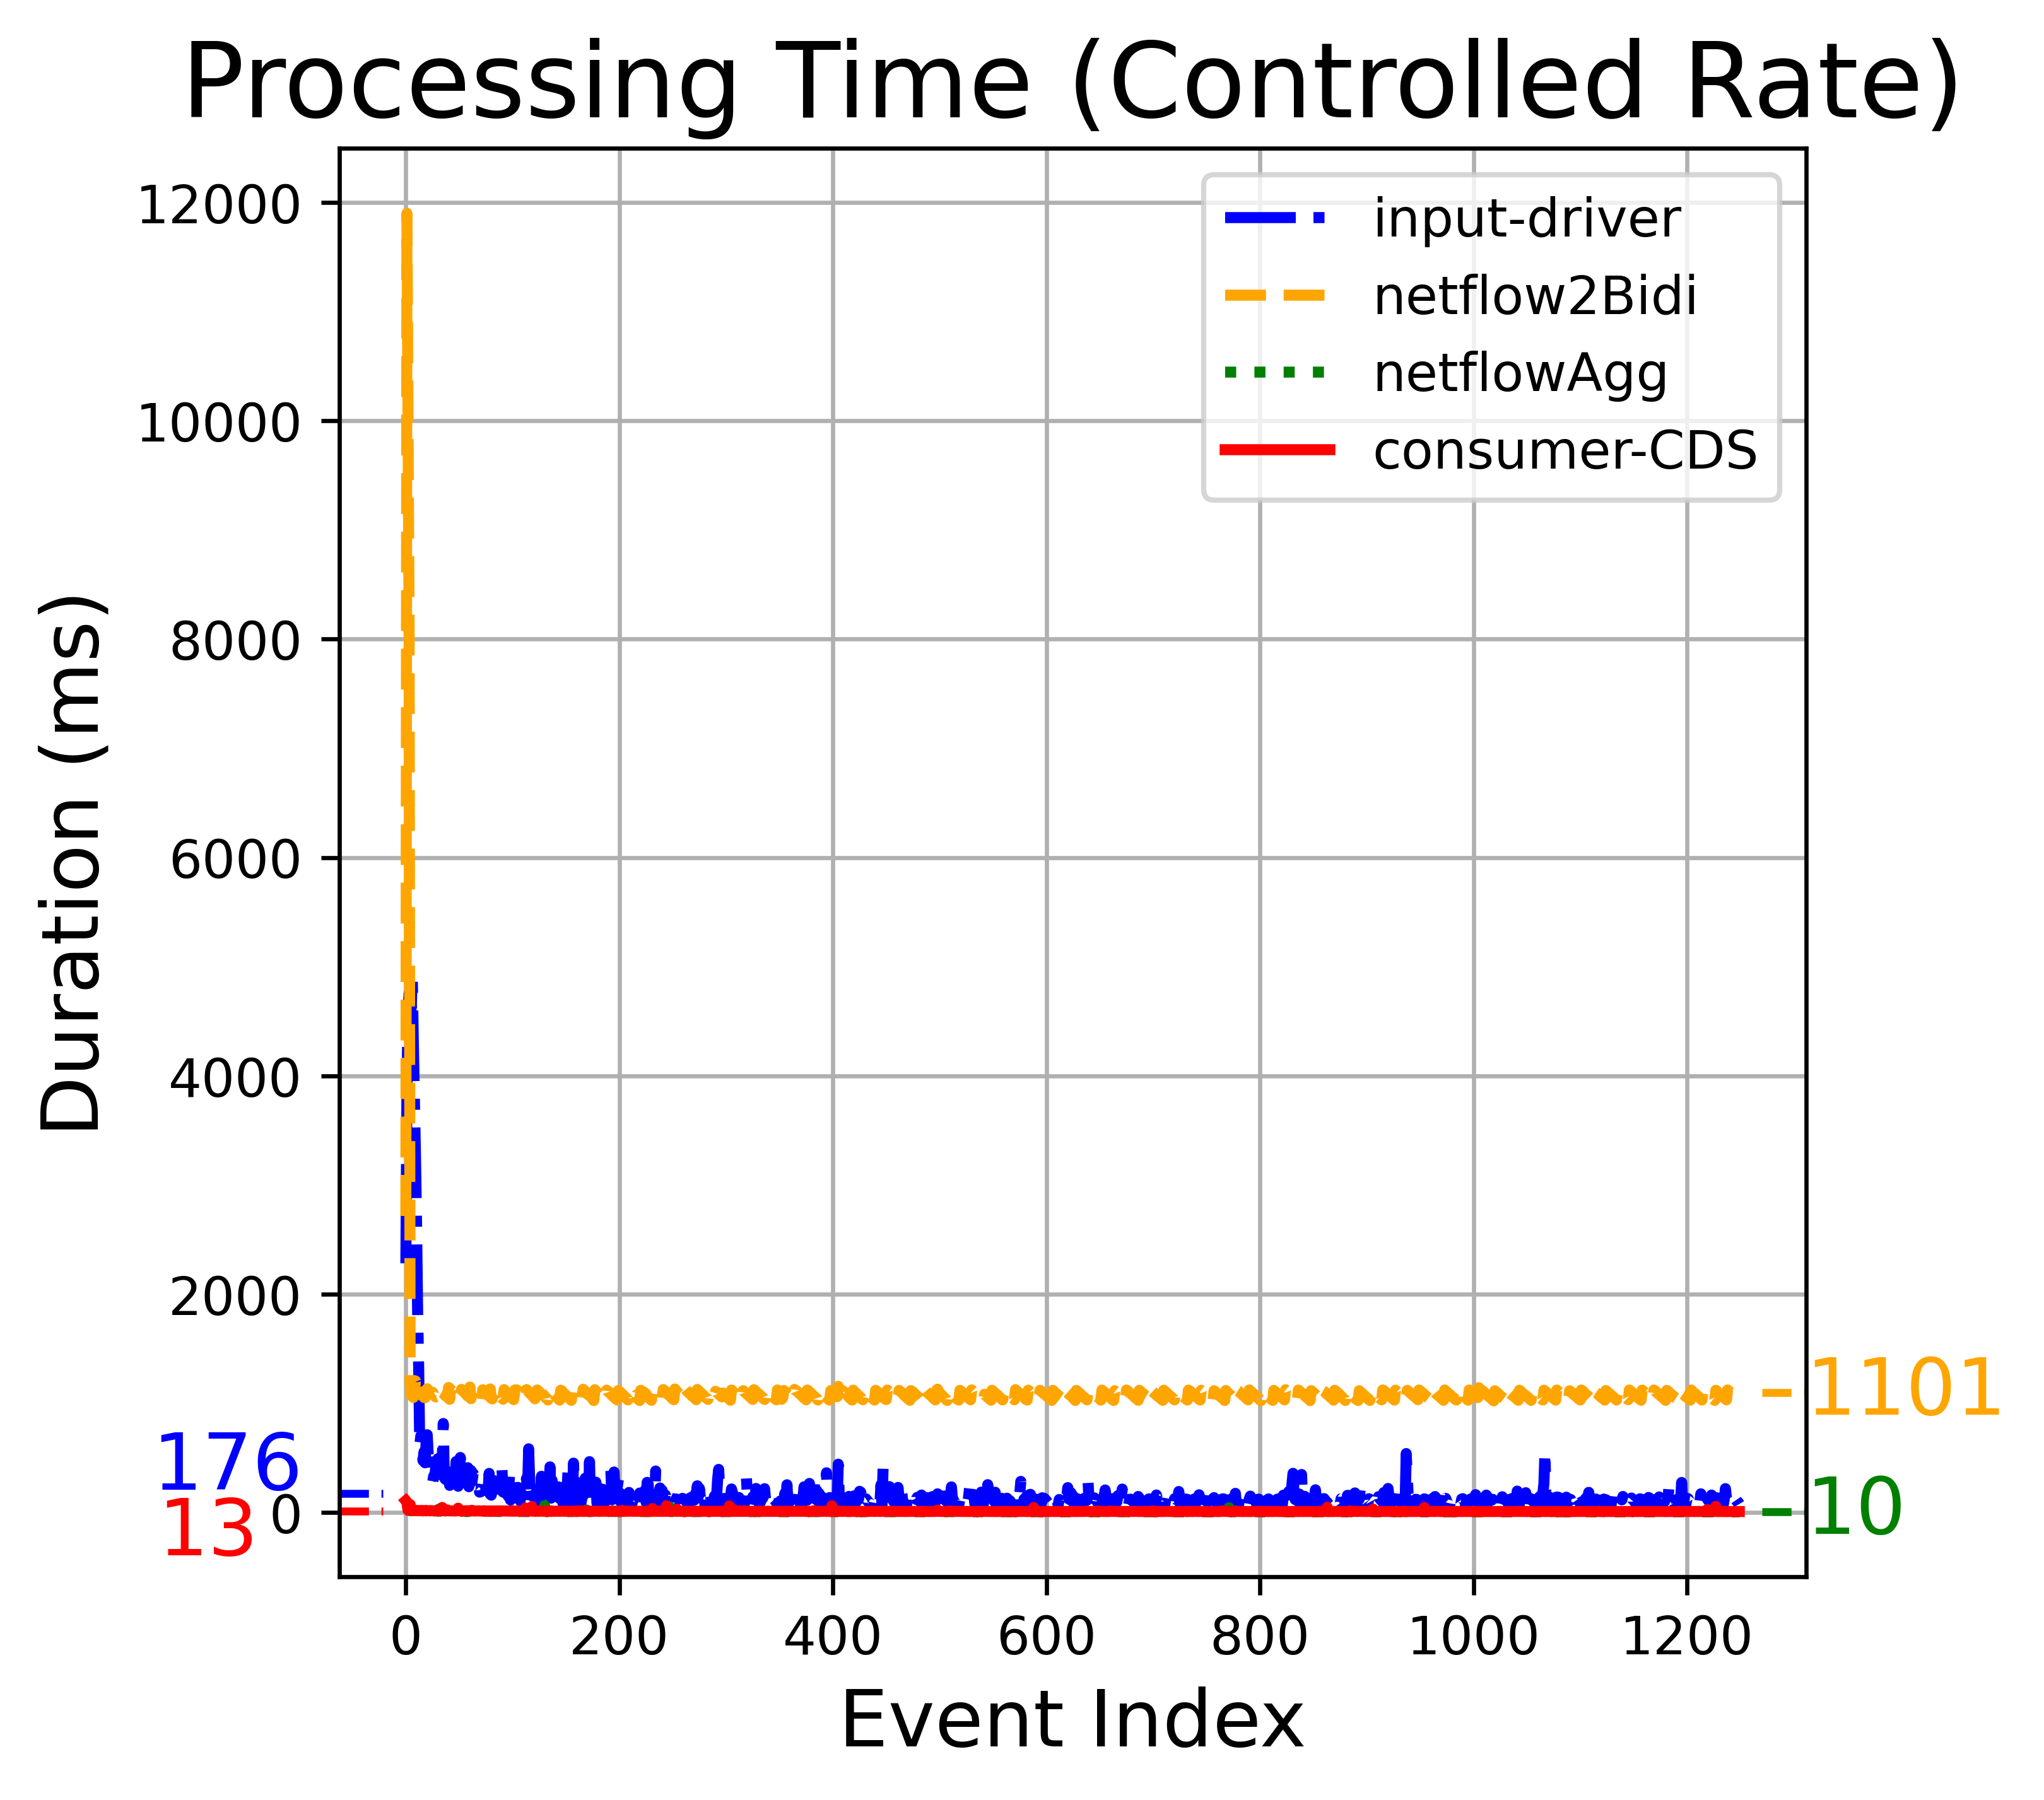

In [7]:
# GRAPH of the latency with with 1 event per second ratio
import matplotlib.transforms as transforms

fig, ax = plt.subplots(figsize=(5, 5), dpi=600)


# LINES
ax.plot(df_input.index.to_list(), df_input["duration_ms"].to_list(), color='blue', label="input-driver", linewidth=2.1, linestyle="dashdot")
ax.plot(df_2Bidi.index.to_list(), df_2Bidi["duration_ms"].to_list(), color='orange', label="netflow2Bidi", linewidth=2.1, linestyle="dashed")
ax.plot(df_agg.index.to_list(), df_agg["duration_ms"].to_list(), color='green', label="netflowAgg", linewidth=2.1, linestyle="dotted")
ax.plot(df_cds.index.to_list(), df_cds["duration_ms"].to_list(), color='red', label="consumer-CDS", linewidth=2.1, linestyle="solid")

# MEANS
ax.axhline(df_input["duration_ms"].mean(), xmin=0, xmax=0.03, color='blue', linestyle='--')
ax.axhline(df_2Bidi["duration_ms"].mean(), xmin=0.97, xmax=1, color='orange', linestyle='--')
ax.axhline(df_agg["duration_ms"].mean(), xmin=0.97, xmax=1, color='green', linestyle='--')
ax.axhline(df_cds["duration_ms"].mean(), xmin=0, xmax=0.03, color='red', linestyle='--')


# CONFIGURATION AX
ax.set_title("Processing Time (Controlled Rate)", size=20)
ax.set_xlabel("Event Index", size=15)
ax.set_ylabel("Duration (ms)",fontsize=15)
ax.legend(loc="best")
ax.grid()
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,df_input["duration_ms"].mean()+240, "{:.0f}".format(df_input["duration_ms"].mean()), color="blue", transform=trans, 
        ha="right", va="center", size=15)
ax.text(-0.03,df_cds["duration_ms"].mean()-200, "{:.0f}".format(df_cds["duration_ms"].mean()), color="red", transform=trans, 
        ha="right", va="center", size=15)
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(1.025,df_2Bidi["duration_ms"].mean(), "{:.0f}".format(df_2Bidi["duration_ms"].mean()), color="orange", transform=trans, 
        ha="left", va="center", size=15)
ax.text(1.025,df_agg["duration_ms"].mean(), "{:.0f}".format(df_agg["duration_ms"].mean()), color="green", transform=trans, 
        ha="left", va="center", size=15)


plt.show()

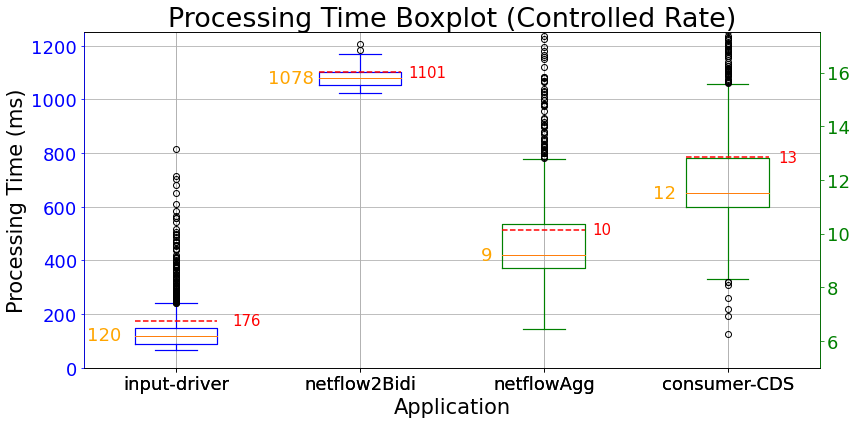

In [8]:
# BOXPLOT of the latency with with 1 event per second ratio
boxplot_dict1 = {}
boxplot_dict1["input-driver"] = df_input["duration_ms"].to_list()
boxplot_dict1["netflow2Bidi"] = df_2Bidi["duration_ms"].to_list()
boxplot_dict1["netflowAgg"] = df_agg["duration_ms"].to_list()
boxplot_dict1["consumer-CDS"] = df_cds["duration_ms"].to_list()

boxplot_dict2 = boxplot_dict1.copy()

boxplot_dict1["netflowAgg"] = boxplot_dict1["netflowAgg"]*0
boxplot_dict1["consumer-CDS"] = boxplot_dict1["consumer-CDS"]*0

# fig, ax = plt.subplots(figsize=(12,7), dpi=600)
fig, ax = plt.subplots(figsize=(12,6))

ax2=ax.twinx()

bp = ax.boxplot(boxplot_dict1.values(), meanline=True, showmeans=True)
for element in ['boxes', 'whiskers', 'fliers', 'caps']:
    plt.setp(bp[element], color="blue", linewidth=1.2) 
plt.setp(bp["means"], color="red", linewidth=1.5)     
ax.set_ylim(0, 1250)

bp2 = ax2.boxplot(boxplot_dict2.values(), meanline=True, showmeans=True)
ax.set_xticklabels(list(boxplot_dict1.keys())*2)
for element in ['boxes', 'whiskers', 'fliers', 'caps']:
    plt.setp(bp2[element], color="green", linewidth=1.2) 
plt.setp(bp2["means"], color="red", linewidth=1.5)      
ax2.set_ylim(5, 17.5)

ax.set_title("Processing Time Boxplot (Controlled Rate)", size=27)
ax.set_xlabel("Application", size=21)
ax.set_ylabel("Processing Time (ms)",fontsize=21)

ax2.spines['left'].set_color('blue')
ax.tick_params(axis="y", colors='blue', which='both')

ax2.spines['right'].set_color('green')
ax2.tick_params(axis="y", colors='green', which='both')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)


# writing the means
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.25,df_input["duration_ms"].mean(), "{:.0f}".format(df_input["duration_ms"].mean()), color="red", transform=trans, 
        ha="right", va="center", size=15)
ax.text(0.45,df_2Bidi["duration_ms"].mean(), "{:.0f}".format(df_2Bidi["duration_ms"].mean()), color="red", transform=trans, 
        ha="left", va="center", size=15)
trans = transforms.blended_transform_factory(
    ax2.get_yticklabels()[0].get_transform(), ax2.transData)
ax2.text(0.681,df_agg["duration_ms"].mean(), "{:.0f}".format(df_agg["duration_ms"].mean()), color="red", transform=trans, 
        ha="left", va="center", size=15)
ax2.text(0.96,df_cds["duration_ms"].mean(), "{:.0f}".format(df_cds["duration_ms"].mean()), color="red", transform=trans, 
        ha="right", va="center", size=15)


# writting the median
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.06,bp['medians'][0].get_ydata()[0], "{:.0f}".format(bp['medians'][0].get_ydata()[0]), color="orange", transform=trans, 
        ha="right", va="center", size=18)
ax.text(0.26,bp['medians'][1].get_ydata()[0], "{:.0f}".format(bp['medians'][1].get_ydata()[0]), color="orange", transform=trans, 
        ha="left", va="center", size=18)
trans = transforms.blended_transform_factory(
    ax2.get_yticklabels()[0].get_transform(), ax2.transData)
ax2.text(0.53,bp2['medians'][2].get_ydata()[0], "{:.0f}".format(bp2['medians'][2].get_ydata()[0]), color="orange", transform=trans, 
        ha="left", va="center", size=18)
ax2.text(0.795,bp2['medians'][3].get_ydata()[0], "{:.0f}".format(bp2['medians'][3].get_ydata()[0]), color="orange", transform=trans, 
        ha="right", va="center", size=18)

ax.grid()
plt.tight_layout()
plt.savefig("fairLatency_boxplot_reduced-less.pdf", format='pdf')
plt.show()